In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets, cluster

import matplotlib.pyplot as plt

from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
arr = np.genfromtxt('/content/drive/MyDrive/Colab/lunarOutputTest.csv',dtype='float',delimiter=',')


tempArr = arr

In [4]:
arr = tempArr

In [5]:
train_y = []
test_y = []
train_x = []
test_x = []
a = 0

arr = arr.tolist()

train_x = arr[0:65]
test_x = arr[65:]
arr = None
#print(len(train_x))
for row in train_x:
    b = 0
    train_y.append(row[0])
    row.pop(0)
    for column in row:
        b+=1
        if (b//2 == 1):
            row.pop(b)
    train_x[a] = row
    a = a + 1
    #print(len(row))
train_x = np.array(train_x)
a = 0
for row in test_x:
    b = 0
    test_y.append(row[0])
    row.pop(0)
    for column in row:
        b+=1
        if (b//2 == 1):
            row.pop(b)
    test_x[a] = row
    a = a + 1
test_x = np.array(test_x)



print(train_x[0])
print(test_x[0])

[-6.15327896e-14 -7.70128843e-14 -8.09615455e-14 ... -9.11190184e-15
 -1.21567322e-14 -7.48151918e-15]
[-2.48617844e-16 -3.20071442e-16 -3.29347087e-16 ... -1.05836457e-15
  1.86492990e-15  2.90248309e-15]


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [7]:
x_train = np.array(train_x)
y_train = np.array(train_y)
x_test = np.array(test_x)
y_test = np.array(test_y)

In [8]:
model = keras.Sequential()

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - loss: 41347.3711 - mae: 41347.3711
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - loss: 41313.7383 - mae: 41313.7383
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 41188.7422 - mae: 41188.7422
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 40956.7148 - mae: 40956.7148
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 40634.3633 - mae: 40634.3633
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 40184.3750 - mae: 40184.3750
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 39570.9141 - mae: 39570.9141
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 38758.1367 - mae: 38758.1367
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 37825.8984 - mae: 37825.8984
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 36548.6289 - mae: 36548.6289
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 34981.8984 - mae: 34981.8984
Epoch 12/150
1/1 ━━━━━━━━━━━━━━

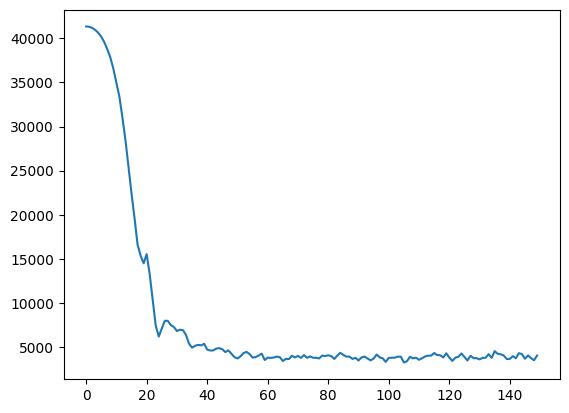

In [9]:
#model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.15))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam',loss='mae', metrics=['mae'])
history = model.fit(x_train, y_train, batch_size=128, epochs=150)
#model.predict(x_test)
model.evaluate(x_test, y_test)

plt.plot(history.epoch, np.array(history.history['loss']), label = "Val_Loss")
plt.show()

In [10]:
#model.compile(optimizer='adam',loss='mae', metrics=['mae'])
model.fit(x_train, y_train, batch_size=128, epochs=75)

Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 4056.1636 - mae: 4056.1636
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 3765.3240 - mae: 3765.3240
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 3879.2935 - mae: 3879.2935
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 3983.3201 - mae: 3983.3201
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 3708.0557 - mae: 3708.0557
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 3863.7437 - mae: 3863.7437
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - loss: 3557.6685 - mae: 3557.6685
Epoch 8/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 3587.2812 - mae: 3587.2812
Epoch 9/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step - loss: 3442.2727 - mae: 3442.2727
Epoch 10/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - loss: 3888.6826 - mae: 3888.6826
Epoch 11/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - loss: 3963.0803 - mae: 3963.0803
Epoch 12/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3601.49

In [11]:
model.predict(x_test)
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step


array([[70025.22  ],
       [11519.29  ],
       [72427.125 ],
       [ 3445.3223],
       [52026.27  ],
       [67022.04  ],
       [67367.11  ],
       [19386.229 ],
       [72521.125 ],
       [38573.363 ],
       [41719.633 ],
       [27565.473 ],
       [74373.56  ],
       [56451.117 ],
       [44532.598 ],
       [53025.535 ],
       [65377.133 ],
       [13640.312 ],
       [48387.312 ],
       [26057.738 ],
       [29237.062 ],
       [29237.062 ],
       [83381.97  ],
       [41086.996 ],
       [31554.166 ],
       [11594.897 ],
       [63363.09  ],
       [18839.5   ],
       [16117.337 ],
       [24171.695 ],
       [59682.348 ],
       [45365.215 ],
       [52605.32  ],
       [45821.754 ],
       [45821.754 ],
       [ 7927.0347],
       [28353.51  ],
       [ 9105.1045],
       [82704.19  ],
       [ 2609.299 ],
       [25699.621 ],
       [66238.91  ],
       [ 2549.7412],
       [20630.484 ],
       [20630.484 ],
       [ 5132.2583],
       [68581.08  ],
       [ 9532

In [12]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[25765.988],
       [33721.24 ],
       [28586.473],
       [27532.23 ]], dtype=float32)

In [13]:
#this will save the trained NN
model.save('/content/drive/MyDrive/Colab/LunarSeismicActivityFinder.keras')